## Объекты вокруг земли



Проблемная область: космические объекты и их угроза для Земли

Объект наблюдения: астероиды и другие малые тела Солнечной системы

Атрибуты: имя объекта, минимальный и максимальный оценочные диаметры, относительная скорость, расстояние промаха, орбитальное тело, объекты программы "Сентри", абсолютная звездная величина, опасность

Пример бизнес-цели: 

    1. Разработка и продажа страховых продуктов для космических рисков. Цель технического проекта: разработка системы оценки рисков и ценообразования для страховых продуктов, защищающих от космических угроз.

    2. Разработка и продажа технологий для мониторинга и предотвращения космических угроз. Цель технического проекта: создание системы мониторинга и прогнозирования траекторий небесных тел для предотвращения космических угроз.

    3. Образовательные программы и сервисы. Цель технического проекта: разработка интерактивных образовательных материалов и сервисов, основанных на данных о небесных телах.

Актуальность: Исследования астероидов и разработка технологий для их отклонения не только помогают защитить Землю от потенциальных угроз, но и стимулируют научные открытия в различных областях, включая астрономию, физику, инженерию и образование. Эта тема имеет важное значение для будущего нашей планеты и человечества в целом.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# вывод всех столбцов
df = pd.read_csv("..//static//csv//neo.csv")
print(df.columns)

Index(['id', 'name', 'est_diameter_min', 'est_diameter_max',
       'relative_velocity', 'miss_distance', 'orbiting_body', 'sentry_object',
       'absolute_magnitude', 'hazardous'],
      dtype='object')


Проверяем на выбросы

Количество выбросов в столбце 'relative_velocity': 1574
Количество выбросов в столбце 'miss_distance': 0
Количество выбросов в столбце 'absolute_magnitude': 101


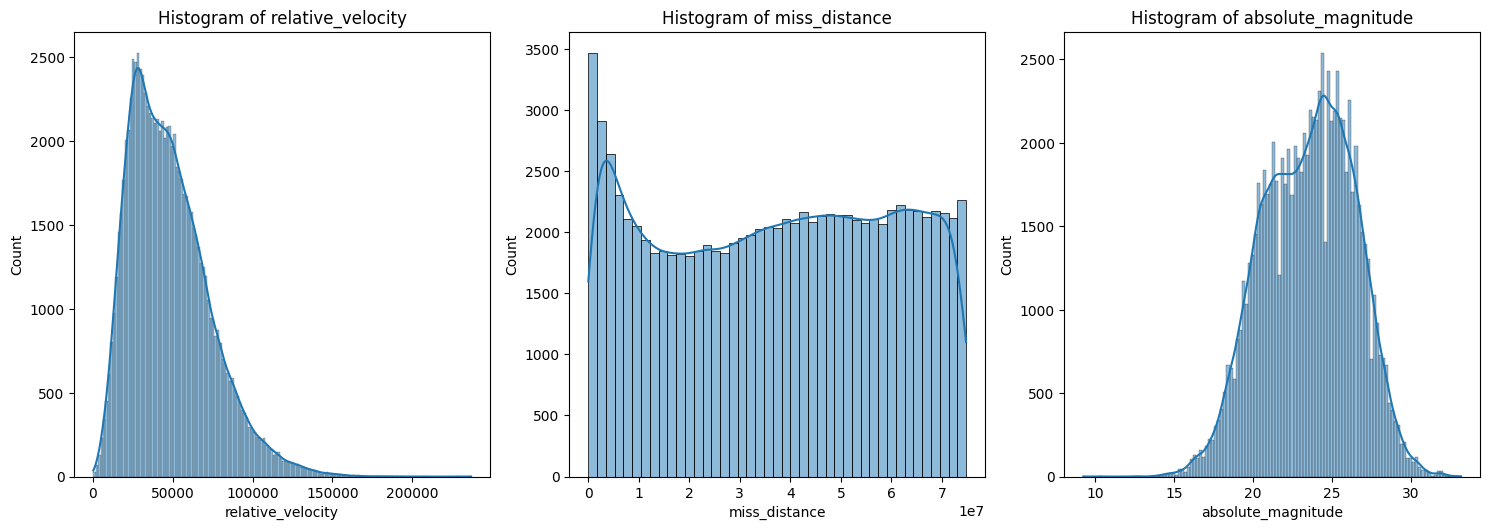

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Выбираем числовые столбцы
numeric_columns = ['relative_velocity', 'miss_distance', 'absolute_magnitude']

# Выбираем столбцы для анализа
columns_to_check = ['relative_velocity', 'miss_distance', 'absolute_magnitude']

# Функция для подсчета выбросов
def count_outliers(df, columns):
    outliers_count = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Считаем количество выбросов
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_count[col] = len(outliers)
    
    return outliers_count

# Подсчитываем выбросы
outliers_count = count_outliers(df, columns_to_check)

# Выводим количество выбросов для каждого столбца
for col, count in outliers_count.items():
    print(f"Количество выбросов в столбце '{col}': {count}")
    
# Создаем гистограммы
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

В столбцах 'relative_velocity'и 'absolute_magnitude' присутствуют выбросы. Теперь можно очистить их от выбросов

Количество выбросов в столбце 'relative_velocity': 248
Количество выбросов в столбце 'absolute_magnitude': 0
Количество удаленных строк: 265


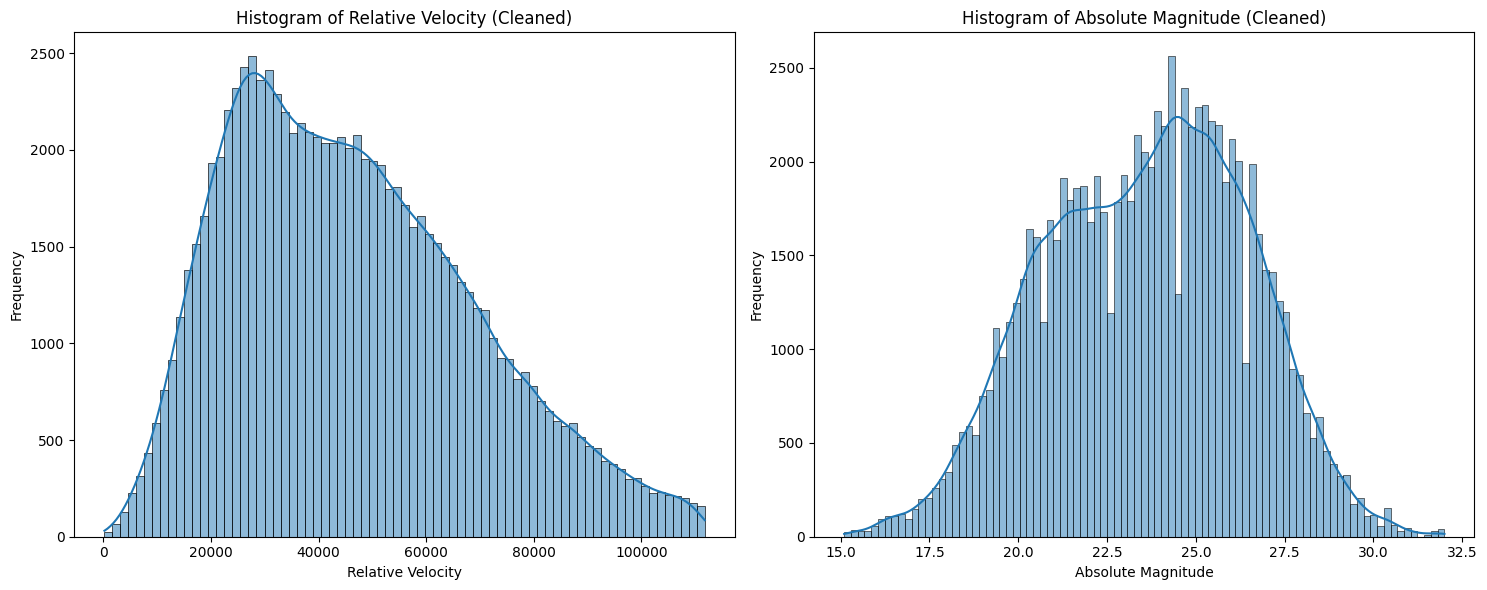

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Выбираем столбцы для анализа
columns_to_check = ['relative_velocity', 'absolute_magnitude']

# Функция для подсчета выбросов
def count_outliers(df, columns):
    outliers_count = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Считаем количество выбросов
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_count[col] = len(outliers)
    
    return outliers_count

# Подсчитываем выбросы
outliers_count = count_outliers(df, columns_to_check)

# Выводим количество выбросов для каждого столбца
for col, count in outliers_count.items():
    print(f"Количество выбросов в столбце '{col}': {count}")
# Выбираем столбцы для очистки
columns_to_clean = ['relative_velocity', 'absolute_magnitude']

# Функция для удаления выбросов
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Удаляем строки, содержащие выбросы
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

# Удаляем выбросы
df_cleaned = remove_outliers(df, columns_to_clean)

# Выводим количество удаленных строк
print(f"Количество удаленных строк: {len(df) - len(df_cleaned)}")

# Создаем гистограммы для очищенных данных
plt.figure(figsize=(15, 6))

# Гистограмма для relative_velocity
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['relative_velocity'], kde=True)
plt.title('Histogram of Relative Velocity (Cleaned)')
plt.xlabel('Relative Velocity')
plt.ylabel('Frequency')

# Гистограмма для absolute_magnitude
plt.subplot(1, 2, 2)
sns.histplot(df_cleaned['absolute_magnitude'], kde=True)
plt.title('Histogram of Absolute Magnitude (Cleaned)')
plt.xlabel('Absolute Magnitude')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Сохраняем очищенный датасет
df_cleaned.to_csv("..//static//csv//neo.csv", index=False)

Можно заметить, что выбросов стало меньше

In [19]:
import pandas as pd

# Проверка на пропущенные значения
missing_values = df.isnull().sum()

# Вывод результатов
print("Количество пропущенных значений в каждом столбце:")
print(missing_values)

Количество пропущенных значений в каждом столбце:
id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64


Пропущенных значений в датасете нет. Можно перейти к созданию выборок

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Предположим, что ваш датасет называется df
# df = pd.read_csv('your_dataset.csv')  # Загрузите ваш датасет, если он в формате CSV

# Разделение на признаки (X) и целевую переменную (y)
# Предположим, что 'hazardous' - это целевая переменная
X = df.drop('hazardous', axis=1)
y = df['hazardous']

# Разбиение на обучающую и остальную выборку (контрольную + тестовую)
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.6, random_state=42)

# Разбиение остатка на контрольную и тестовую выборки
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)

# Вывод размеров выборок
print("Размер обучающей выборки:", X_train.shape)
print("Размер контрольной выборки:", X_val.shape)
print("Размер тестовой выборки:", X_test.shape)

Размер обучающей выборки: (53494, 9)
Размер контрольной выборки: (17832, 9)
Размер тестовой выборки: (17832, 9)


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Разделение на признаки (X) и целевую переменную (y)
# Предположим, что 'hazardous' - это целевая переменная
X = df.drop('hazardous', axis=1)
y = df['hazardous']

# Разбиение на обучающую и остальную выборку (контрольную + тестовую)
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.6, random_state=42, stratify=y)

# Разбиение остатка на контрольную и тестовую выборки
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42, stratify=y_rem)

# Функция для анализа сбалансированности
def analyze_balance(y_train, y_val, y_test):
    print("Распределение классов в обучающей выборке:")
    print(y_train.value_counts(normalize=True))
    
    print("\nРаспределение классов в контрольной выборке:")
    print(y_val.value_counts(normalize=True))
    
    print("\nРаспределение классов в тестовой выборке:")
    print(y_test.value_counts(normalize=True))

# Анализ сбалансированности
analyze_balance(y_train, y_val, y_test)

Распределение классов в обучающей выборке:
hazardous
False    0.905989
True     0.094011
Name: proportion, dtype: float64

Распределение классов в контрольной выборке:
hazardous
False    0.905956
True     0.094044
Name: proportion, dtype: float64

Распределение классов в тестовой выборке:
hazardous
False    0.906012
True     0.093988
Name: proportion, dtype: float64


Выборки хорошо сбалансированы и не нуждаются в корректировках

## Диабет у индейцев Пима

Проблемная область: медицина и эпидемиология

Объект наблюдения: женщины индейского племени Пима, проживающие вблизи Финикса, штат Аризона, США

Атрибуты: беременность, глюкоза, артериальное давление, толщина кожи, инсулин, индекс массы тела, родословная диабета, возраст, исход

Пример бизнес-цели: 

    1. Повышение эффективности скрининга диабета. Цель технического проекта: Разработать и обучить модель машинного обучения с точностью предсказания не менее 85% для автоматизированного скрининга диабета на основе данных датасета "Диабет у индейцев Пима".

    2. Снижение медицинских расходов. Цель технического проекта: Оптимизировать модель прогнозирования таким образом, чтобы минимизировать количество ложноотрицательных результатов (пациенты с диабетом, которые не были выявлены), что позволит снизить затраты на лечение осложнений.

    3. Повышение качества жизни пациентов. Цель технического проекта: Разработать интерфейс для модели, который будет предоставлять пациентам персонализированные рекомендации по профилактике и лечению диабета на основе их индивидуальных рисков, определенных моделью.

In [2]:
import pandas as pd 
df = pd.read_csv("..//static//csv//diabetes.csv")
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


Проверяем на выбросы

Количество выбросов в столбце 'Pregnancies': 4
Количество выбросов в столбце 'Glucose': 5
Количество выбросов в столбце 'BloodPressure': 45


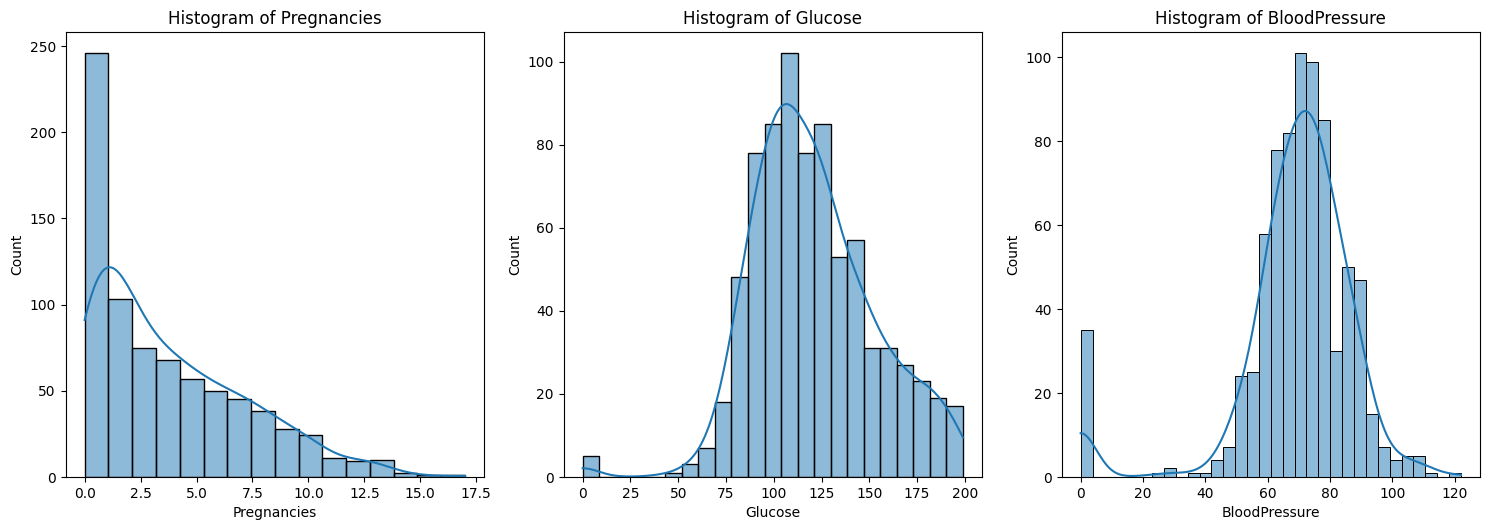

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("..//static//csv//diabetes.csv")

# Выбираем числовые столбцы
numeric_columns = ['Pregnancies', 'Glucose', 'BloodPressure']

# Выбираем столбцы для анализа
columns_to_check = ['Pregnancies', 'Glucose', 'BloodPressure']

# Функция для подсчета выбросов
def count_outliers(df, columns):
    outliers_count = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Считаем количество выбросов
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_count[col] = len(outliers)
    
    return outliers_count

# Подсчитываем выбросы
outliers_count = count_outliers(df, columns_to_check)

# Выводим количество выбросов для каждого столбца
for col, count in outliers_count.items():
    print(f"Количество выбросов в столбце '{col}': {count}")
    
# Создаем гистограммы
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

Можем заметить, что количество выбросов очень мало. Сделаем очистку от выбросов для столцба 'BloodPressure'

Количество удаленных строк: 45
Количество выбросов в столбце 'BloodPressure': 4


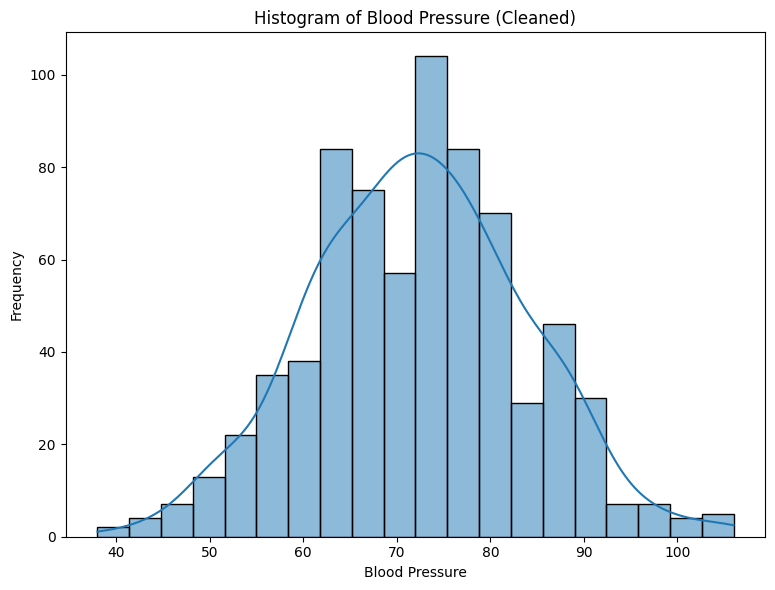

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
   
# Выбираем столбцы для очистки
columns_to_clean =  ['BloodPressure']

# Функция для удаления выбросов
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Удаляем строки, содержащие выбросы
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

# Удаляем выбросы
df_cleaned = remove_outliers(df, columns_to_clean)

# Выводим количество удаленных строк
print(f"Количество удаленных строк: {len(df) - len(df_cleaned)}")

df = df_cleaned

# Выбираем столбцы для анализа
columns_to_check = ['BloodPressure']

# Функция для подсчета выбросов
def count_outliers(df, columns):
    outliers_count = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Считаем количество выбросов
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_count[col] = len(outliers)
    
    return outliers_count

# Подсчитываем выбросы
outliers_count = count_outliers(df, columns_to_check)

# Выводим количество выбросов для каждого столбца
for col, count in outliers_count.items():
    print(f"Количество выбросов в столбце '{col}': {count}")
 

# Создаем гистограммы для очищенных данных
plt.figure(figsize=(15, 6))

# Гистограмма для relative_velocity
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['BloodPressure'], kde=True)
plt.title('Histogram of Blood Pressure (Cleaned)')
plt.xlabel('Blood Pressure')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Проверка на пропущенные значения

In [34]:
import pandas as pd

# Проверка на пропущенные значения
missing_values = df.isnull().sum()

# Вывод результатов
print("Количество пропущенных значений в каждом столбце:")
print(missing_values)

Количество пропущенных значений в каждом столбце:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Пропущенных значений нет. Делаем разбиение на выборки

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Разделение на признаки (X) и целевую переменную (y)
X = df.drop('Insulin', axis=1)
y = df['Insulin']

# Разбиение на обучающую и остальную выборку (контрольную + тестовую)
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.6, random_state=42)

# Разбиение остатка на контрольную и тестовую выборки
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)

# Вывод размеров выборок
print("Размер обучающей выборки:", X_train.shape)
print("Размер контрольной выборки:", X_val.shape)
print("Размер тестовой выборки:", X_test.shape)

Размер обучающей выборки: (433, 8)
Размер контрольной выборки: (145, 8)
Размер тестовой выборки: (145, 8)


## НЛО

Проблемная область: наблюдениями и отчетами о неопознанных летающих объектах (НЛО)

Объект наблюдения: неопознанные летающие объекты (НЛО)

Атрибуты: описание, город, штат, дата и время наблюдения, форма НЛО, продолжительность наблюдения, статистика, ссылка на отчет о наблюдении, текст отчета о наблюдении, дата публикации отчета, широта города, долгота города.
с
Пример бизнес-цели: 

    1. Повышение эффективности скрининга диабета. Цель технического проекта: Разработать и обучить модель машинного обучения с точностью предсказания не менее 85% для автоматизированного скрининга диабета на основе данных датасета "Диабет у индейцев Пима".

    2. Снижение медицинских расходов. Цель технического проекта: Оптимизировать модель прогнозирования таким образом, чтобы минимизировать количество ложноотрицательных результатов (пациенты с диабетом, которые не были выявлены), что позволит снизить затраты на лечение осложнений.

    3. Повышение качества жизни пациентов. Цель технического проекта: Разработать интерфейс для модели, который будет предоставлять пациентам персонализированные рекомендации по профилактике и лечению диабета на основе их индивидуальных рисков, определенных моделью.

In [3]:
import pandas as pd 
df = pd.read_csv("..//static//csv//nuforc_reports.csv")
print(df.columns)

Index(['summary', 'city', 'state', 'date_time', 'shape', 'duration', 'stats',
       'report_link', 'text', 'posted', 'city_latitude', 'city_longitude'],
      dtype='object')
